# Visualise targets for simulation

3D plot showing the targets for simulation

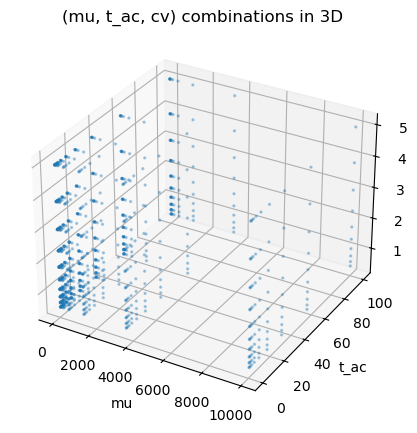

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
# Load the full grid of verified targets (IY010_simulation.py and IY010_simulation_1.py)
mu_target = np.logspace(0, 4, 10)  # 1 to 10000
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100
cv_target = np.logspace(-0.3, 0.7, 10)  # ~0.5 to 5

# mu_target = np.linspace(1, 10_000, 10)
# t_ac_target = np.linspace(0.5, 100, 10)
# cv_target = np.linspace(0.5, 5, 10)

# mu_target = np.arange(1, 10_000, 1000)
# t_ac_target = np.arange(0.5, 100, 10)
# cv_target = np.arange(0.5, 5, 0.5)

targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)

# Create a 3D scatter plot of mu vs t_ac vs cv
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title('(mu, t_ac, cv) combinations in 3D')
plt.show()


Data distribution plots for the specified stats

CV values range from 0.50 to 5.01.


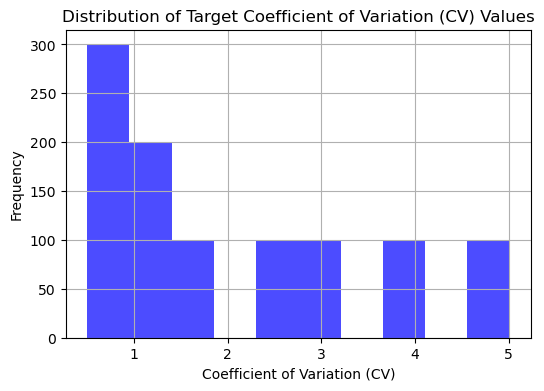

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_targets = pd.DataFrame(targets, columns=['mu', 't_ac', 'cv'])
# what ranges of CV values are chosen? 
cv_min = df_targets['cv'].min()
cv_max = df_targets['cv'].max()
print(f"CV values range from {cv_min:.2f} to {cv_max:.2f}.")
# plot the distribution of cv values chosen
plt.figure(figsize=(6, 4))
plt.hist(df_targets['cv'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Coefficient of Variation (CV) Values')
plt.grid()  
plt.show()

mu values range from 1.00 to 10000.00.


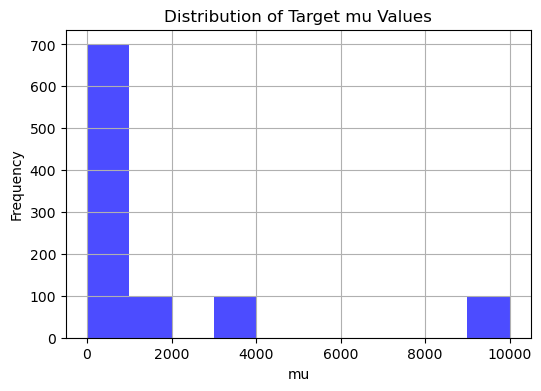

In [3]:
mu_min = df_targets['mu'].min()
mu_max = df_targets['mu'].max()
print(f"mu values range from {mu_min:.2f} to {mu_max:.2f}.")
# plot the distribution 
plt.figure(figsize=(6, 4))
plt.hist(df_targets['mu'], bins=10, color='blue', alpha=0.7)
plt.xlabel('mu')
plt.ylabel('Frequency')
plt.title('Distribution of Target mu Values')
plt.grid()  
plt.show()

t_ac values range from 0.50 to 100.00.


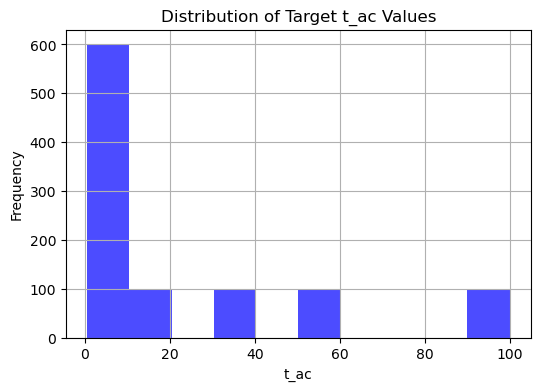

In [4]:
t_ac_min = df_targets['t_ac'].min()
t_ac_max = df_targets['t_ac'].max()
print(f"t_ac values range from {t_ac_min:.2f} to {t_ac_max:.2f}.")
# plot the distribution 
plt.figure(figsize=(6, 4))
plt.hist(df_targets['t_ac'], bins=10, color='blue', alpha=0.7)
plt.xlabel('t_ac')
plt.ylabel('Frequency')
plt.title('Distribution of Target t_ac Values')
plt.grid()  
plt.show()

2D histograms for pairwise parameter combinations

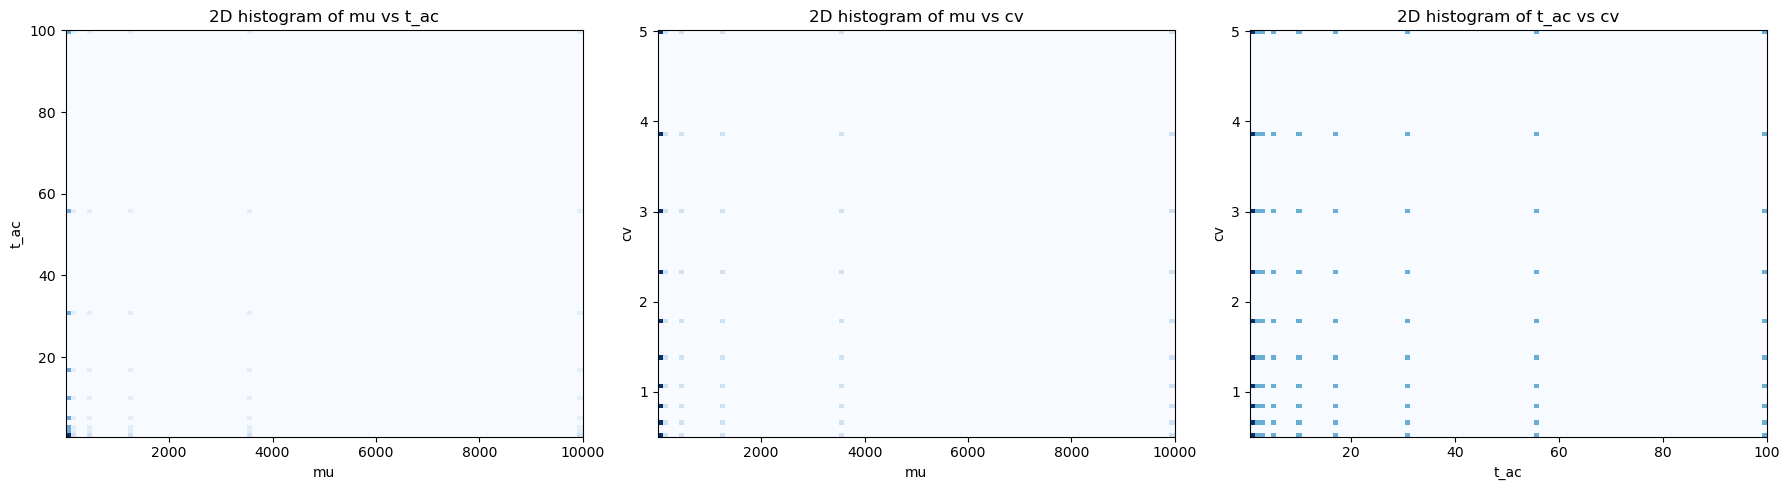

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(df_targets['mu'], df_targets['t_ac'], bins=100, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('2D histogram of mu vs t_ac')

axes[1].hist2d(df_targets['mu'], df_targets['cv'], bins=100, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('2D histogram of mu vs cv')

axes[2].hist2d(df_targets['t_ac'], df_targets['cv'], bins=100, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('2D histogram of t_ac vs cv')

plt.tight_layout()
plt.show()

## Solbol-sampled parameter space
This section verifies that Sobol sampling covers the parameter space evenly.

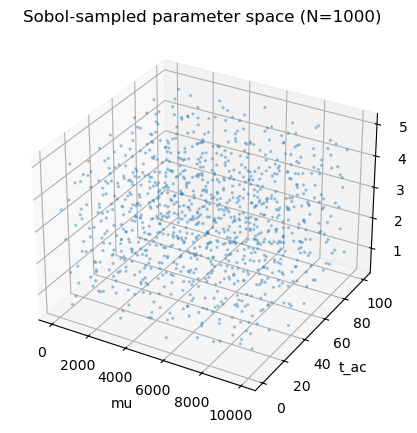

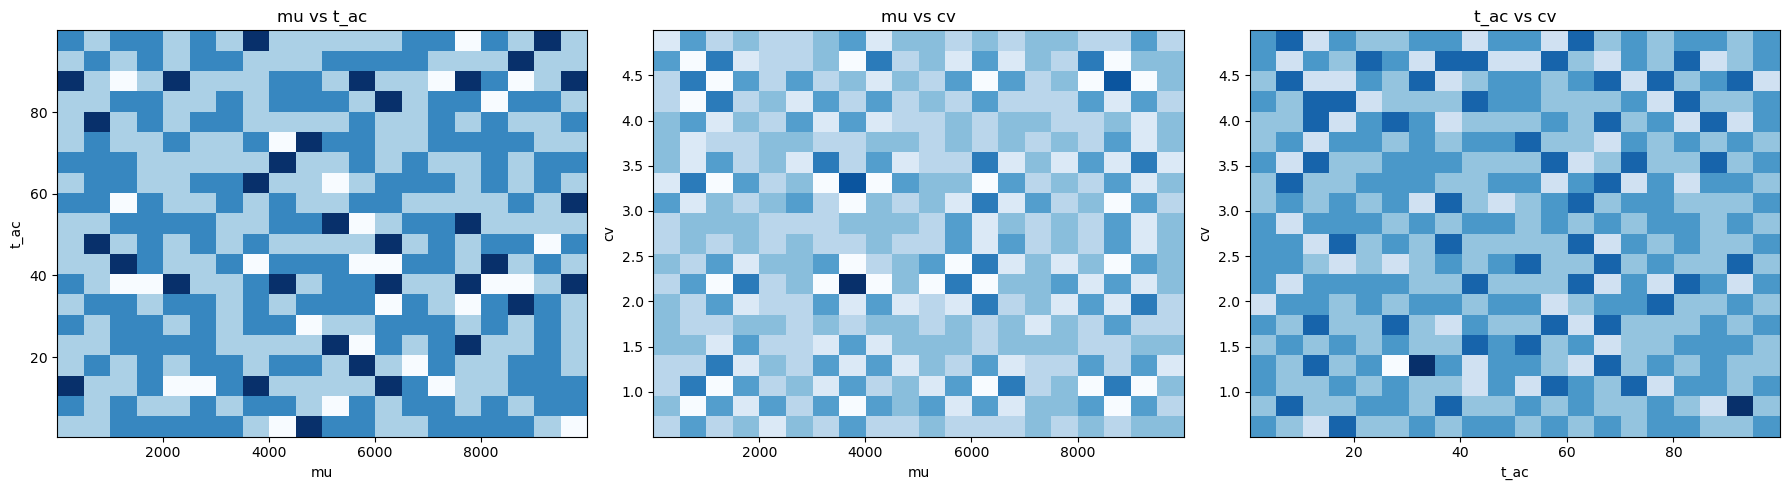

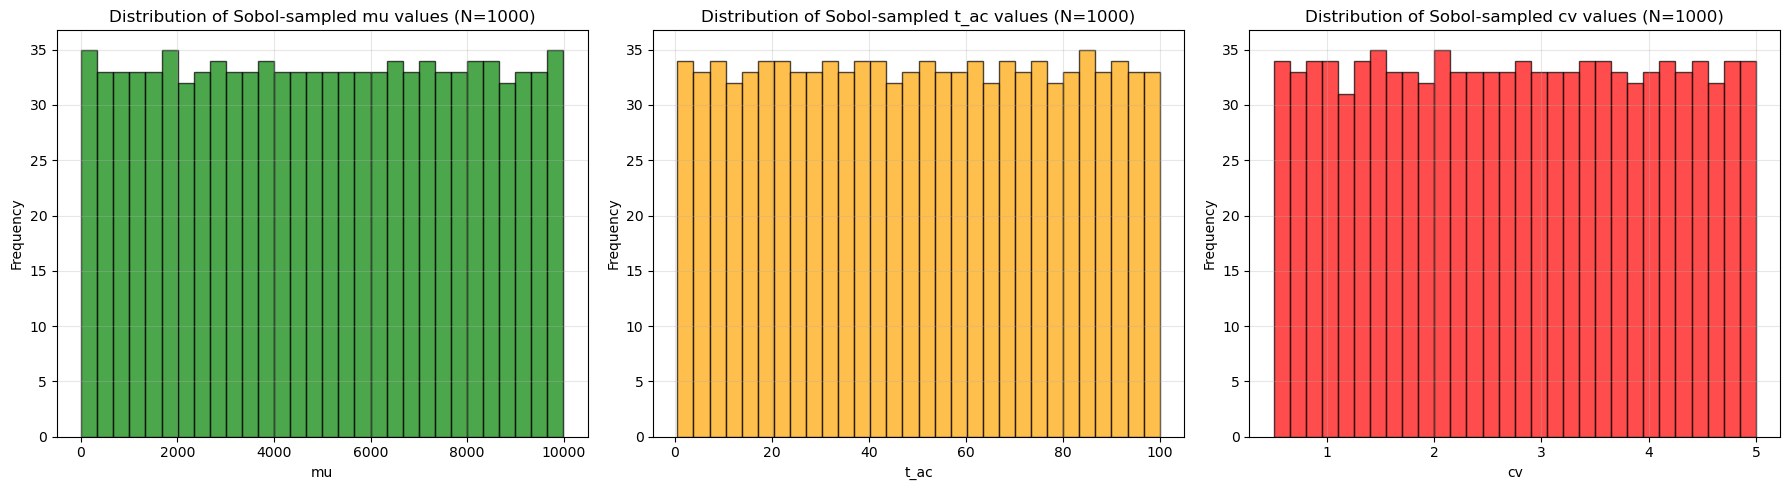

In [ ]:
# replace the 10×10×10 grid with N Sobol samples
N = 1000  # or any budget you prefer
sobol = qmc.Sobol(d=3, scramble=True, seed=42)
U = sobol.random_base2(int(np.ceil(np.log2(N))))[:N]  # N points in [0,1)^3

mu_target  = qmc.scale(U[:,0:1], [1], [10_000])      # map to [1, 10000]
tacs_target = qmc.scale(U[:,1:2], [0.5], [100])      # map to [0.5, 100]
cvs_target  = qmc.scale(U[:,2:3], [0.5], [5.0])      # map to [0.5, 5.0]

# Flatten the arrays since qmc.scale returns 2D arrays
mu_target = mu_target.flatten()
tacs_target = tacs_target.flatten()
cvs_target = cvs_target.flatten()

# plot for mu_target, tacs_target and cvs_target here
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu_target, tacs_target, cvs_target, s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title(f'Sobol-sampled parameter space (N={N})')
plt.show()

fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].hist2d(mu_target, tacs_target, bins=20, cmap='Blues')
axes[0].set_xlabel('mu'); axes[0].set_ylabel('t_ac'); axes[0].set_title('mu vs t_ac')
axes[1].hist2d(mu_target, cvs_target, bins=20, cmap='Blues')
axes[1].set_xlabel('mu'); axes[1].set_ylabel('cv'); axes[1].set_title('mu vs cv')
axes[2].hist2d(tacs_target, cvs_target, bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac'); axes[2].set_ylabel('cv'); axes[2].set_title('t_ac vs cv')
plt.tight_layout()
plt.show()

# Distribution plots for Sobol-sampled parameters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(mu_target, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sobol-sampled mu values (N=1000)')
axes[0].grid(True, alpha=0.3)

axes[1].hist(tacs_target, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('t_ac')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sobol-sampled t_ac values (N=1000)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(cvs_target, bins=30, color='red', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('cv')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Sobol-sampled cv values (N=1000)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
